In [78]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
import math

In [79]:
from sklearn.datasets import load_digits
images, labels = load_digits(2, return_X_y=True)

# Labeled training set
training_images = images[:300]
train = training_images
training_labels = labels[:300]

# Labeled test set
test_images = images[300:]
test_labels = labels[300:]
print(test_images.shape)

(60L, 64L)


## k-NN Classification Using 2-D Features

### Center training data

In [80]:
# Computation of the empirical mean of data, both as a vector and as a tiled matrix
new_training_images = (np.sum(training_images, axis=0))/300
#mean_mat = np.tile()

# Centered data matrix
training_centered = training_images - new_training_images


### PCA of training data

In [81]:
# Singular Value and Eigenvalue Decomposition of training data
# Singular Value Decomposition of training_images:

U,D,VT = np.linalg.svd(training_centered) 
print("The left singular matrix of training data is : ")
print(U)
print("\n")

# Compute XX(transpose)
X_XT = np.matmul(training_centered,training_centered.transpose())


# w gives the eigen values, v gives the eigen vectors
w,v = np.linalg.eig(X_XT)
print("\n")
#print(w)

print("The indices of the maximum eigen values")
top = (-w).argsort()[:2]
print((-w).argsort()[:2])
print("\n")

print("The top 2 PCA Components")
PCA = v[:,top]
print(PCA.shape)
print(training_labels.shape)
 



The left singular matrix of training data is : 
[[ 6.46377079e-02 -1.58874097e-03  1.35998005e-03 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-8.13015756e-02 -7.45547849e-03  1.64672015e-02 ...  7.57830444e-02
   1.29630665e-03  5.13951416e-03]
 [ 4.47470468e-02 -2.15953877e-04  4.46417572e-02 ... -6.32716529e-02
   6.36156078e-02  9.58577665e-02]
 ...
 [-3.33115966e-03  1.33884827e-01 -5.86861115e-02 ...  7.44338270e-01
   1.54446407e-02 -1.86493141e-02]
 [ 7.39864043e-02 -9.59594291e-03  7.53748795e-03 ...  2.12829470e-02
   8.51669581e-01 -5.58216327e-02]
 [ 7.20429872e-02 -1.71744609e-02 -2.59479760e-02 ... -4.30433918e-03
  -5.63903302e-02  8.46364291e-01]]




The indices of the maximum eigen values
[0 1]


The top 2 PCA Components
(300L, 2L)
(300L,)


### Scatter plot of training data

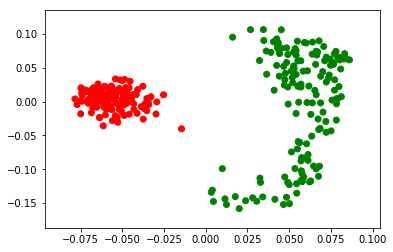

In [82]:
# Scatter Plots
# original data samples
label_color_dict = {0:'red',1:'green'}

# Color vector creation
cvec = [label_color_dict[label] for label in training_labels[:]]
#print(cvec)

plt.scatter(PCA[:, 0], PCA[:, 1], color = cvec)



# KNN on test data 

### Center test data

In [83]:
# Computation of the empirical mean of data, both as a vector and as a tiled matrix
new_test_images = (np.sum(test_images, axis=0))/60


# Centered data matrix
test_centered = test_images - new_test_images


In [84]:
# Singular Value and Eigenvalue Decomposition of testing data
# Singular Value Decomposition of testing_images:

U_test,D_test,VT_test = np.linalg.svd(test_centered, full_matrices=True) 
print("The left singular matrix of testing data is : ")
print(U_test)
print("\n")

# Compute XX(transpose)
X_XT_test = np.matmul(test_centered,test_centered.transpose())


# w gives the eigen values, v gives the eigen vectors
w_test,v_test = np.linalg.eig(X_XT_test)
print("\n")
#print(w)

print("The indices of the maximum eigen values")
top_test = (-w_test).argsort()[:2]
print((-w_test).argsort()[:2])
print("\n")

print("The top 2 PCA Components")
PCA_test = v_test[:,top_test]
#print(PCA_test)


The left singular matrix of testing data is : 
[[-0.13735682 -0.01397738  0.15017317 ... -0.04655568 -0.10676143
  -0.09512653]
 [-0.08341488  0.38170415 -0.01298143 ... -0.00939618 -0.0381324
   0.04359539]
 [-0.00293161  0.32593424 -0.02773281 ...  0.04133766  0.07371036
  -0.13946694]
 ...
 [-0.07455548 -0.11933728  0.00898389 ...  0.03961286 -0.02378166
   0.09313677]
 [ 0.09010618 -0.04115638 -0.22469292 ...  0.16832017 -0.01950335
  -0.07980374]
 [-0.15132644 -0.05676095 -0.11684448 ... -0.06676747 -0.18845027
  -0.00654032]]




The indices of the maximum eigen values
[0 1]


The top 2 PCA Components


## KNN algorithm from scratch

### Algorithm
#### Find the euclidean distance corresponding to each row in the test data from the training data. Sort the distances to get 5 minimum distances and find the labels corresponding to those distances.
#### Find the label that out numbers the rest of the labels and assign it to each of the testing data
#### Computer the difference between actual labels and the labels that we get. If the difference is either 1 or -1, the data is incorrectly classified and if the difference is 0 the data is correctly classified

In [85]:
# each row of test_matrix_labels corresponds to the distance of each row of test data from 5 nearest points from training data

test_matrix_labels = np.eye(60,5)


new_test_labels = []
for i in range(60):
    distances = []
    
    for j in range(300):
        X = PCA[j,:]  - PCA_test[i,:]  
        distances.append(np.linalg.norm(X))
        
        
    distances = np.array(distances)
    distances_new = np.argsort(distances) # returns the index of top 5 minimum distances 
    distances_new = distances_new[0:5] 
    
    #get the training data corresponding to each distances_new index
    #test_matrix_data[i,:] = PCA[distances_new,:]
    test_matrix_labels[i,:] = training_labels[distances_new]
    new_test_labels.append(int(max(test_matrix_labels[i,:].tolist(),key=(test_matrix_labels[i,:].tolist()).count)))
    
    
        
print(np.array(new_test_labels))
print("\n")
print("The actual test data")
print(test_labels)
print("\n")
print(np.array(new_test_labels)-test_labels)

diff = np.array(new_test_labels)-test_labels
new_diff = []
for i in diff:
    if i != 0:
        i ='incorrectly classified'
    else:
        i = 'correctly classified'
    new_diff.append(i)


[1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1
 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1]


The actual test data
[0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0
 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0]


[ 1  0  0  0  0  0  1  0  1  1 -1  1 -1  1 -1  1  1 -1 -1  1  1  1 -1 -1
  1  1 -1 -1 -1 -1 -1  1 -1  1  1 -1  1 -1  1 -1  1  1 -1 -1  1  1  1 -1
 -1  1  1  1 -1 -1 -1 -1 -1  1 -1  1]


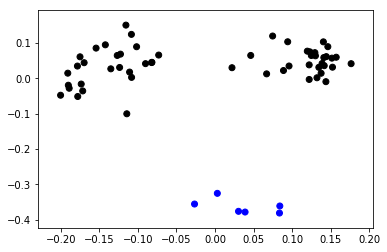

In [86]:
# Scatter Plots
# original data samples
label_color_test = {'correctly classified':'blue','incorrectly classified':'black'}

# Color vector creation
cvec_test = [label_color_test[label] for label in new_diff]
#print(cvec)

plt.scatter(PCA_test[:, 0], PCA_test[:, 1], color = cvec_test)

In [87]:
#Average Classification Error
avg_error = []
avg = 0
print(diff)
for i in diff.tolist():
    if i != 0:
        i=1
    else:
        i=0
    avg_error.append(i)
for i in avg_error:
    avg = avg + i
print(avg)
    
avg = avg/60
print(avg)
#avg_classification = np.sum((avg_error))/60
#print(avg_classification)
#print(avg_error)

[ 1  0  0  0  0  0  1  0  1  1 -1  1 -1  1 -1  1  1 -1 -1  1  1  1 -1 -1
  1  1 -1 -1 -1 -1 -1  1 -1  1  1 -1  1 -1  1 -1  1  1 -1 -1  1  1  1 -1
 -1  1  1  1 -1 -1 -1 -1 -1  1 -1  1]
54
0.9


## k-NN Classification Using Higher-dimensional Features

In [88]:
#1. r-Dimensional PCA Features
from sklearn.decomposition import PCA
#1. Principal Component Analysis

#Mean Centering:sum
mean_vec = (np.sum(training_images, axis=0))/300
training_images = training_images - mean_vec

#Singular Value Decomposition
u_tr,v_tr,sh_tr = np.linalg.svd(training_images,True)

#Finding r-value
r = 0; cum_sum = 0
variance = np.linalg.norm(training_images)**2
for i in range(len(training_images)):
    print(i)
    cum_sum = cum_sum + v_tr[i]**2
    if cum_sum/variance >= 0.95:
        r = i+1
        break
print(training_images.shape)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
(300L, 64L)


### R dimensional PCA for training dataset

In [89]:
# r dimensional PCA features
# Singular Value and Eigenvalue Decomposition of training data
# Singular Value Decomposition of training_images:

Ur,Dr,VTr = np.linalg.svd(training_centered) 
print("The left singular matrix of training data is : ")
print(U)
print("\n")

# Compute XX(transpose)
X_XTr = np.matmul(training_centered,training_centered.transpose())


# w gives the eigen values, v gives the eigen vectors
wr,vr = np.linalg.eig(X_XTr)
print("\n")
#print(w)

print("The indices of the maximum eigen values")
topr = (-wr).argsort()[:r]
print((-wr).argsort()[:r])
print("\n")

print("The top r PCA Components")
PCAr = v[:,topr]
print(PCAr.shape)


The left singular matrix of training data is : 
[[ 6.46377079e-02 -1.58874097e-03  1.35998005e-03 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-8.13015756e-02 -7.45547849e-03  1.64672015e-02 ...  7.57830444e-02
   1.29630665e-03  5.13951416e-03]
 [ 4.47470468e-02 -2.15953877e-04  4.46417572e-02 ... -6.32716529e-02
   6.36156078e-02  9.58577665e-02]
 ...
 [-3.33115966e-03  1.33884827e-01 -5.86861115e-02 ...  7.44338270e-01
   1.54446407e-02 -1.86493141e-02]
 [ 7.39864043e-02 -9.59594291e-03  7.53748795e-03 ...  2.12829470e-02
   8.51669581e-01 -5.58216327e-02]
 [ 7.20429872e-02 -1.71744609e-02 -2.59479760e-02 ... -4.30433918e-03
  -5.63903302e-02  8.46364291e-01]]




The indices of the maximum eigen values
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


The top r PCA Components
(300L, 19L)


### r dimensional PCA features for test data

In [90]:
# Singular Value and Eigenvalue Decomposition of testing data
# Singular Value Decomposition of testing_images:

U_testr,D_testr,VT_testr = np.linalg.svd(test_centered, full_matrices=True) 
print("The left singular matrix of testing data is : ")
print(U_testr)
print("\n")

# Compute XX(transpose)
X_XT_testr = np.matmul(test_centered,test_centered.transpose())


# w gives the eigen values, v gives the eigen vectors
w_testr,v_testr = np.linalg.eig(X_XT_testr)
print("\n")
#print(w)

print("The indices of the maximum eigen values")
top_testr = (-w_testr).argsort()[:r]
print((-w_testr).argsort()[:r])
print("\n")

print("The top r PCA Components")
PCA_testr = v_testr[:,top_testr]
print(PCA_testr.shape)


The left singular matrix of testing data is : 
[[-0.13735682 -0.01397738  0.15017317 ... -0.04655568 -0.10676143
  -0.09512653]
 [-0.08341488  0.38170415 -0.01298143 ... -0.00939618 -0.0381324
   0.04359539]
 [-0.00293161  0.32593424 -0.02773281 ...  0.04133766  0.07371036
  -0.13946694]
 ...
 [-0.07455548 -0.11933728  0.00898389 ...  0.03961286 -0.02378166
   0.09313677]
 [ 0.09010618 -0.04115638 -0.22469292 ...  0.16832017 -0.01950335
  -0.07980374]
 [-0.15132644 -0.05676095 -0.11684448 ... -0.06676747 -0.18845027
  -0.00654032]]




The indices of the maximum eigen values
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


The top r PCA Components
(60L, 19L)


In [91]:
# for k from 1 to 9 where k is odd, initilaize a numpy array where each row gives the classification //
# labels error(-1,1,0) for each k
# k = 1,3,5,7,9
average_list = []
#matrix_diff_k = np.eye(5,60)
for k in range(1,10,2):
    #print(k)
    test_matrix_labelsr = np.eye(60,k) #get the labels for each testing data
    new_test_labelsr = []
    for i in range(60):
        distancesr = []
        for j in range(300):
            Xr = PCAr[j,:]  - PCA_testr[i,:]  
            distancesr.append(np.linalg.norm(Xr))
        
        distancesr = np.array(distancesr)
        distances_newr = np.argsort(distancesr) # returns the index of top 5 minimum distances 
        distances_newr = distances_newr[0:k] 
        #print(distances_newr)
        #get the training data corresponding to each distances_new index
        #test_matrix_data[i,:] = PCA[distances_new,:]
        test_matrix_labelsr[i,:] = training_labels[distances_newr]
        #print(test_matrix_labelsr.shape)
        new_test_labelsr.append(int(max(test_matrix_labelsr[i,:].tolist(),key=(test_matrix_labelsr[i,:].tolist()).count)))
    
    
        
    #print(np.array(new_test_labelsr))
    #print("\n")
    #print("The actual test data")
    #print(test_labels)
    #print("\n")
    #print(np.array(new_test_labelsr)-test_labels)

    diffr = np.array(new_test_labelsr)-test_labels
    new_diffr = []
    for y in diffr:
        if y != 0:
            y ='incorrectly classified'
        else:
            y = 'correctly classified'
        new_diffr.append(y)
    #Average Classification Error
    avg_error = []
    avg = 0
    #print(diffr)
    for u in diff.tolist():
        if u != 0:
            u=1
        else:
            u=0
        avg_error.append(u)
    for t in avg_error:
        avg = avg + t
    #print(avg)
    
    avg = avg/60
    #print(avg)
    average_list.append(avg)
print(average_list)

[0.9, 0.9, 0.9, 0.9, 0.9]


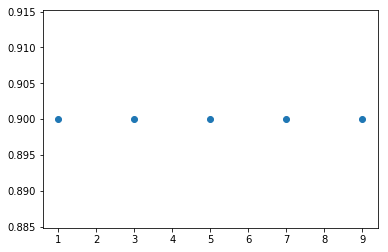

In [92]:
k = [1,3,5,7,9]
plt.scatter(k,average_list)

### we are not supposed to get the same average value for each k. But after implementing a few lines of code using scikit learn for cross checking my values, I noticed that the error was zero for k=5 and went slightly up for other values of k. This is due to more variation in the scattered data.